<a href="https://colab.research.google.com/github/rgolds5/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Pitch_Call_Accuracy_Corrected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install PyBaseball, a python data analysis library that scrapes baseball data websites.

In [1]:
pip install pybaseball

  Stored in directory: /root/.cache/pip/wheels/ec/07/ea/c76916b911a2f060d1dfa2e900460e6b5004ef334ff83cb419
Successfully built pybaseball


Import Statcast from PyBaseball. Statcast contains a trove of information regarding each pitch delivered during every baseball game.

Import pandas and numpy.

In [0]:
from pybaseball import statcast
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
pd.set_option('mode.chained_assignment', None)

Use statcast to import pitch data. Statcast takes two parameters, the starting and ending dates, inclusive, of the data you want to import. Technically, if you are only importing one day, then only the start date parameter is needed.

In [3]:
data = statcast(start_dt = '2018-06-06', end_dt = '2018-06-06')
data.head()

,index,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
0,326,SI,2018-06-06,92.1,1.0257,6.1848,Matt Grace,605480.0,594840.0,strikeout,swinging_strike,NaN,NaN,NaN,NaN,9.0,Mallex Smith strikes out swinging.,R,L,L,WSH,TB,S,2.0,NaN,0.0,2.0,2018.0,1.1300,0.5868,0.4120,1.2830,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,600474.0,NaN,180606_195553,-3.9196,-133.8950,-7.7756,14.1810,28.8195,-23.8155,3.1406,1.3024,NaN,NaN,NaN,91.225,1855.0,5.805,530332.0,594840.0,600474.0,448602.0,506703.0,543685.0,594694.0,665742.0,572191.0,571718.0,54.6950,NaN,NaN,0.0,1.0,0.0,0.0,NaN,77.0,4.0,Sinker,11.0,2.0,2.0,11.0,2.0,11.0,2.0,11.0,Standard,Standard
1,338,SL,2018-06-06,82.5,1.3629,6.0599,Matt Grace,605480.0,594840.0,NaN,foul,NaN,NaN,NaN,NaN,9.0,NaN,R,L,L,WSH,TB,S,NaN,NaN,0.0,2.0,2018.0,-0.4414,0.0800,0.3447,1.4218,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,600474.0,NaN,180606_195532,-1.4611,-119.9572,-4.1278,-3.8724,23.3600,-30.8686,3.1406,1.3024,NaN,NaN,NaN,81.477,2029.0,5.654,530332.0,594840.0,600474.0,448602.0,506703.0,543685.0,594694.0,665742.0,572191.0,571718.0,54.8455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,3.0,Slider,11.0,2.0,2.0,11.0,2.0,11.0,2.0,11.0,Standard,Standard
2,351,SL,2018-06-06,83.7,1.3559,6.0831,Matt Grace,605480.0,594840.0,NaN,foul,NaN,NaN,NaN,NaN,6.0,NaN,R,L,L,WSH,TB,S,NaN,NaN,0.0,1.0,2018.0,-0.3690,0.2660,0.3284,2.1027,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,600474.0,NaN,180606_195509,-1.6437,-121.8221,-3.2876,-3.3077,22.6585,-29.1892,3.1406,1.3024,3.0,66.7,-38.0,83.107,2080.0,5.764,530332.0,594840.0,600474.0,448602.0,506703.0,543685.0,594694.0,665742.0,572191.0,571718.0,54.7354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,2.0,Slider,11.0,2.0,2.0,11.0,2.0,11.0,2.0,11.0,Standard,Standard
3,364,SI,2018-06-06,92.5,1.0789,6.2245,Matt Grace,605480.0,594840.0,NaN,called_strike,NaN,NaN,NaN,NaN,6.0,NaN,R,L,L,WSH,TB,S,NaN,NaN,0.0,0.0,2018.0,1.2101,0.6038,0.7191,2.2220,NaN,NaN,NaN,2.0,9.0,Top,NaN,NaN,NaN,NaN,600474.0,NaN,180606_195452,-3.5044,-134.7101,-5.7349,15.3571,26.5658,-23.9357,3.4058,1.4960,NaN,NaN,NaN,92.484,1865.0,6.030,530332.0,594840.0,600474.0,448602.0,506703.0,543685.0,594694.0,665742.0,572191.0,571718.0,54.4700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.0,1.0,Sinker,11.0,2.0,2.0,11.0,2.0,11.0,2.0,11.0,Standard,Standard
4,377,SI,2018-06-06,92.3,1.1047,6.1647,Matt Grace,460576.0,594840.0,double_play,hit_into_play,NaN,NaN,NaN,NaN,14.0,Carlos Gomez lines into an unassisted double p...,R,R,L,WSH,TB,X,3.0,line_drive,0.0,1.0,2018.0,1.0747,0.7485,1.1699,2.0744,NaN,NaN,543543.0,0.0,9.0,Top,151.89,168.36,NaN,NaN,600474.0,NaN,180606_195416,-2.0939,-134.3641,-6.1748,13.2434,26.4724,-22.2450,3.4222,1.4331,146.0,84.8,9.0,91.771,1869.0,5.747,530332.0,594840.0,600474.0,448602.0,506703.0,543685.0,594694.0,665742.0,572191.0,571718.0,54.7529,0.521,0.456,0.0,1.0,0.0,0.0,4.0,76.0,2.0,Sinker,11.0,2.0,2.0,11.0,2.0,11.0,2.0,11.0,Standard,Standard


Filter the data by columns we will be using. Some of these columns will be used now and others will be used for a later project.

In [4]:
columns_to_keep = ['index', 'pitch_type', 'game_date', 'release_speed', 
                    'batter', 'pitcher', 'description', 'zone', 'stand', 
                    'p_throws', 'balls', 'strikes', 'pfx_x', 'pfx_z', 
                    'plate_x', 'plate_z', 'inning', 'inning_topbot', 
                    'fielder_2', 'sz_top', 'sz_bot', 'effective_speed', 
                    'game_pk', 'pitch_name']

data = data[columns_to_keep]
data.head(2)

,index,pitch_type,game_date,release_speed,batter,pitcher,description,zone,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,inning,inning_topbot,fielder_2,sz_top,sz_bot,effective_speed,game_pk,pitch_name
0,326,SI,2018-06-06,92.1,605480.0,594840.0,swinging_strike,9.0,L,L,0.0,2.0,1.1300,0.5868,0.4120,1.2830,9.0,Top,600474.0,3.1406,1.3024,91.225,530332.0,Sinker
1,338,SL,2018-06-06,82.5,605480.0,594840.0,foul,9.0,L,L,0.0,2.0,-0.4414,0.0800,0.3447,1.4218,9.0,Top,600474.0,3.1406,1.3024,81.477,530332.0,Slider


The data obtained from statcast is already well structured and clean. The columns we kept contained no missing data, and the columns that we will be using are already usable types. 

For our purposes, we only need to work with pitches that were either called a strike or ball by the home plate umpire, so we will filter our dataset by whether the 'description' column contains either 'ball' or 'called_strike'.

In [5]:
data = data[(data['description'] == 'ball') | (data['description'] == 'called_strike')]
data['description'].value_counts()

ball             1605
called_strike     790
Name: description, dtype: int64

The first values we will use are the 'x' and 'z' coordinates of where the center of the baseball meets the front edge of home plate. These are denoted by 'plate_x' and 'plate_z', respectively, in the dataset columns. We want to account for both a 1-inch margin of error that the pitch tracking manufacturerer provides and the three inch diameter of the baseball. 

To do this we create an interval for each coordinate by creating four new columns, a lower and upper value for the 'x' coordinate and a lower and upper value for the 'z' coordinate. The lower value is created by subtracting 2 inches from the coordinate, and the upper value is created by adding 2 inches to the coordinate.

In [6]:
data['plate_x_lower'] = data['plate_x'] - 0.167
data['plate_x_upper'] = data['plate_x'] + 0.167

data['plate_z_lower'] = data['plate_z'] - 0.167
data['plate_z_upper'] = data['plate_z'] + 0.167

data.head(2)

,index,pitch_type,game_date,release_speed,batter,pitcher,description,zone,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,inning,inning_topbot,fielder_2,sz_top,sz_bot,effective_speed,game_pk,pitch_name,plate_x_lower,plate_x_upper,plate_z_lower,plate_z_upper
3,364,SI,2018-06-06,92.5,605480.0,594840.0,called_strike,6.0,L,L,0.0,0.0,1.2101,0.6038,0.7191,2.2220,9.0,Top,600474.0,3.4058,1.4960,92.484,530332.0,Sinker,0.5521,0.8861,2.0550,2.3890
5,391,SI,2018-06-06,92.5,460576.0,594840.0,called_strike,1.0,R,L,0.0,0.0,1.1930,0.5965,-0.7407,3.2144,9.0,Top,600474.0,3.5083,1.6697,92.269,530332.0,Sinker,-0.9077,-0.5737,3.0474,3.3814


Next, we need to account for the depth of the strike zone. Our data contains two columns, 'pfx_x' and 'pfx_z'. 'pfx_x' is the value, in inches, that the ball moves horizontally from the release point (measured at 40 feet in front of home plate) to the front edge of home plate. 'pfx_z' is the value, in inches, that the ball moves vertically from the release point (measured at 40 feet in front of home plate) to the front edge of home plate. 

We first convert the provided value from the inches the ball moves in 40 feet, to the inches the ball moves vertically and horizontally in a span of 17 inches. This will give us a fairly accurate measure of how the balls moves vertically and horizontailly as it moves over the home plate area. 

Once we have our conversion variable, we then create four new columns that give us an interval of coordinates of where the ball crosses the back edge of home plate. 

In [7]:
pfx_x_convert = (17 * data['pfx_x']) / 480
pfx_z_convert = (17 * data['pfx_z']) / 480

data['back_plate_x_lower'] = data['plate_x_lower'] + pfx_x_convert
data['back_plate_x_upper'] = data['plate_x_upper'] + pfx_x_convert


data['back_plate_z_lower'] = data['plate_z_lower'] + pfx_z_convert
data['back_plate_z_upper'] = data['plate_z_upper'] + pfx_z_convert

data.head(2)

,index,pitch_type,game_date,release_speed,batter,pitcher,description,zone,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,inning,inning_topbot,fielder_2,sz_top,sz_bot,effective_speed,game_pk,pitch_name,plate_x_lower,plate_x_upper,plate_z_lower,plate_z_upper,back_plate_x_lower,back_plate_x_upper,back_plate_z_lower,back_plate_z_upper
3,364,SI,2018-06-06,92.5,605480.0,594840.0,called_strike,6.0,L,L,0.0,0.0,1.2101,0.6038,0.7191,2.2220,9.0,Top,600474.0,3.4058,1.4960,92.484,530332.0,Sinker,0.5521,0.8861,2.0550,2.3890,0.594958,0.928958,2.076385,2.410385
5,391,SI,2018-06-06,92.5,460576.0,594840.0,called_strike,1.0,R,L,0.0,0.0,1.1930,0.5965,-0.7407,3.2144,9.0,Top,600474.0,3.5083,1.6697,92.269,530332.0,Sinker,-0.9077,-0.5737,3.0474,3.3814,-0.865448,-0.531448,3.068526,3.402526


Next we consolidate the intervals we created into one 'x' interval and one 'z' interval by using the minimum of the two lower bounds and the maximum of the two upper bounds. I use numpy's where function to achieve this. I'll be using the 'where' function for much of the rest of this portion of the project. 

Using 'where', I can provide a conditional statement, and then provide what I want to return if the conditional is True and a separate value to return if the condition is false. I find it a great resourse to use when I want to create columns of binary values based on conditions of other columns. 

In [8]:
data['new_plate_x_lower'] = np.where(data['plate_x_lower'] <= data['back_plate_x_lower'], data['plate_x_lower'], data['back_plate_x_lower'])
data['new_plate_x_upper'] = np.where(data['plate_x_upper'] >= data['back_plate_x_upper'], data['plate_x_upper'], data['back_plate_x_upper'])

data['new_plate_z_lower'] = np.where(data['plate_z_lower'] <= data['back_plate_z_lower'], data['plate_z_lower'], data['back_plate_z_lower'])
data['new_plate_z_upper'] = np.where(data['plate_z_upper'] >= data['back_plate_z_upper'], data['plate_z_upper'], data['back_plate_z_upper'])

data.head(2)

,index,pitch_type,game_date,release_speed,batter,pitcher,description,zone,stand,p_throws,balls,strikes,pfx_x,pfx_z,plate_x,plate_z,inning,inning_topbot,fielder_2,sz_top,sz_bot,effective_speed,game_pk,pitch_name,plate_x_lower,plate_x_upper,plate_z_lower,plate_z_upper,back_plate_x_lower,back_plate_x_upper,back_plate_z_lower,back_plate_z_upper,new_plate_x_lower,new_plate_x_upper,new_plate_z_lower,new_plate_z_upper
3,364,SI,2018-06-06,92.5,605480.0,594840.0,called_strike,6.0,L,L,0.0,0.0,1.2101,0.6038,0.7191,2.2220,9.0,Top,600474.0,3.4058,1.4960,92.484,530332.0,Sinker,0.5521,0.8861,2.0550,2.3890,0.594958,0.928958,2.076385,2.410385,0.5521,0.928958,2.0550,2.410385
5,391,SI,2018-06-06,92.5,460576.0,594840.0,called_strike,1.0,R,L,0.0,0.0,1.1930,0.5965,-0.7407,3.2144,9.0,Top,600474.0,3.5083,1.6697,92.269,530332.0,Sinker,-0.9077,-0.5737,3.0474,3.3814,-0.865448,-0.531448,3.068526,3.402526,-0.9077,-0.531448,3.0474,3.402526


For this part of the project I no longer need the extra interval columns that I created or the orignal 'x' and 'y' coordinates. Because I will be using, in a future add-on to this project, these and other columns that I previously kept, I will create a new dataframe with only the columns that I need for now.

In [9]:
data_2 = data[['description', 'sz_top', 'sz_bot', 'new_plate_x_lower', 
               'new_plate_x_upper', 'new_plate_z_lower', 'new_plate_z_upper']]
data_2.head(2)

,description,sz_top,sz_bot,new_plate_x_lower,new_plate_x_upper,new_plate_z_lower,new_plate_z_upper
3,called_strike,3.4058,1.4960,0.5521,0.928958,2.0550,2.410385
5,called_strike,3.5083,1.6697,-0.9077,-0.531448,3.0474,3.402526


Now it's time to determine whether or not pitches are actually in the strike zone. I begin by creating four columns that denote four areas outside the strikezone (left of the zone, right of the zone, below the zone, and above the zone). 

To create the 'left_of_zone' value, we determine whether or not the upper value of the 'x' interval falls to the left of the zone. If it does, then that means the entire 'x' interval falls left of the zone. 

For the 'right_of_zone' value, we determine whether or not the lower value of the 'x' interval falls to the right of the zone. If it does, then that means the entire 'x' interval falls to right of the zone. 

The dataset provides us with two additional columns that we will use to determine if a pitch is 'below_zone' (low) or 'above_zone' (high). 
'sz_bot' is the value, in inches, that the bottom of the strike zone is above the ground. 'sz_top' is the value, in inches' that the top of the strike zone is above the ground. These values are manually determined by the Pitch F/X operator, and they vary for each pitch based on the height of the batter and the batter's stance. 

For the 'below_zone' value, we determine whether or not the upper value of the 'z' interval falls below the zone. If it does, then that means the entire 'z' interval falls below the zone.

For the 'above_zone' value, we determine whether or not the lower value of the 'z' interval falls above the zone. If it does, then that means the entire 'z' interval falls above the zone. 

We again use numpy's where function and assign a value of 1 or 0 to each area. 

In [10]:
data_2['left_of_zone'] = np.where(data_2['new_plate_x_upper'] <= -0.70833, 1, 0)
data_2['right_of_zone'] = np.where(data_2['new_plate_x_lower'] >= 0.70833, 1, 0)
data_2['below_zone'] = np.where(data_2['new_plate_z_upper'] <= data_2['sz_bot'], 1, 0)
data_2['above_zone'] = np.where(data_2['new_plate_z_lower'] >= data_2['sz_top'], 1, 0)
data_2.head(2)

,description,sz_top,sz_bot,new_plate_x_lower,new_plate_x_upper,new_plate_z_lower,new_plate_z_upper,left_of_zone,right_of_zone,below_zone,above_zone
3,called_strike,3.4058,1.4960,0.5521,0.928958,2.0550,2.410385,0,0,0,0
5,called_strike,3.5083,1.6697,-0.9077,-0.531448,3.0474,3.402526,0,0,0,0


Next we will determine if a pitch should be considered a borderline pitch. A borderline pitch is one in which either, or both, the 'x' interval and/or the 'z' interval cross over the bounds of the strike zone. Borderline pitches cannot be accurately judged by technology and should be deemed a correct call no matter if they were called a strike or a ball. 

We break the border up into four areas. We do this not only because it is a simpler to read, but also we will be using the seperate columns in a later addition to the project. A pitch is determined to be 'left_border' if the 'x' interval crosses over the left strike zone edge, 'right_border', if the 'x' interval crosses over the right strike zone edge, 'bot_border' if the 'z' interval crosses over the bottom edge, and 'top_border' if the 'z' interval crosses over the top edge. 

In [11]:
data_2['left_border'] = np.where((data_2['new_plate_x_lower'] <= -0.70833) & (data_2['new_plate_x_upper'] >= -0.70833), 1, 0)
data_2['right_border'] = np.where((data_2['new_plate_x_lower'] <= 0.70833) & (data_2['new_plate_x_upper'] >= 0.70833), 1, 0)
data_2['bot_border'] = np.where((data_2['new_plate_z_lower'] <= data['sz_bot']) & (data_2['new_plate_z_upper'] >= data_2['sz_bot']), 1, 0)
data_2['top_border'] = np.where((data_2['new_plate_z_lower'] <= data['sz_top']) & (data_2['new_plate_z_upper'] >= data_2['sz_top']), 1, 0)
data_2.head(2)

,description,sz_top,sz_bot,new_plate_x_lower,new_plate_x_upper,new_plate_z_lower,new_plate_z_upper,left_of_zone,right_of_zone,below_zone,above_zone,left_border,right_border,bot_border,top_border
3,called_strike,3.4058,1.4960,0.5521,0.928958,2.0550,2.410385,0,0,0,0,0,1,0,0
5,called_strike,3.5083,1.6697,-0.9077,-0.531448,3.0474,3.402526,0,0,0,0,1,0,0,0


Next, we'll create two columns that describe, first, whether our pitch is a borderline pitch, and, second, whether the pitch should have been a 'called_strike' or a 'ball', based solely whether the intervals fell completely outside of the zone or not. 

Any pitch with zeros in all four of the 'border' columns will get a zero in the 'borderline_pitch' column, meaning that is is not a borderline pitch. All other pitches will get a 1, meaning they are borderline pitches. 

Any pitch with zeros in all four of the 'zone' columns will recieve a 'correct_description' of 'called_strike'. All other pitches will receive a 'correct_description' of 'ball'. 

In [12]:
data_2['borderline_pitch'] = np.where((data_2['left_border'] == 0) & (data_2['right_border'] == 0) & (data_2['bot_border'] == 0) & (data_2['top_border'] == 0), 0, 1)
data_2['correct_description'] = np.where((data_2['left_of_zone'] == 0) & (data_2['right_of_zone'] == 0) & (data_2['below_zone'] == 0) & (data_2['above_zone'] == 0), 'called_strike', 'ball')
data_2.head(2)

,description,sz_top,sz_bot,new_plate_x_lower,new_plate_x_upper,new_plate_z_lower,new_plate_z_upper,left_of_zone,right_of_zone,below_zone,above_zone,left_border,right_border,bot_border,top_border,borderline_pitch,correct_description
3,called_strike,3.4058,1.4960,0.5521,0.928958,2.0550,2.410385,0,0,0,0,0,1,0,0,1,called_strike
5,called_strike,3.5083,1.6697,-0.9077,-0.531448,3.0474,3.402526,0,0,0,0,1,0,0,0,1,called_strike


Finally, we will determine whether a pitch was correctly or incorrectly adjudicated. All borderline pitches will be automatically denoted as correctly adjudicated. The rest of the pitches will be denoted as correct if the 'description' column and the 'correct_description' column match.

In [13]:
data_2['correct_call'] = np.where((data_2['borderline_pitch'] == 1) | (data_2['description'] == data_2['correct_description']), 1, 0)
data_2.head(2)

,description,sz_top,sz_bot,new_plate_x_lower,new_plate_x_upper,new_plate_z_lower,new_plate_z_upper,left_of_zone,right_of_zone,below_zone,above_zone,left_border,right_border,bot_border,top_border,borderline_pitch,correct_description,correct_call
3,called_strike,3.4058,1.4960,0.5521,0.928958,2.0550,2.410385,0,0,0,0,0,1,0,0,1,called_strike,1
5,called_strike,3.5083,1.6697,-0.9077,-0.531448,3.0474,3.402526,0,0,0,0,1,0,0,0,1,called_strike,1


We will now print our correct call percentage total from our data frame. 

In [14]:
correct_call_total = round((sum(data_2['correct_call']) / len(data_2['correct_call'])) * 100, 2)

print(f'Correct Call total: {correct_call_total}%')

Correct Call total: 97.08%


Because of the resources required to scrape the data of 15 million pitches, and then process that down to determine the call accuracy for 4 million of those pitches, I put all of the processes described above, which only used one days worth of pitches, into a function and ran that outside of colab. I will manually input the data in order to build visualizations. 

In [16]:
data_3_url = 'https://raw.githubusercontent.com/rgolds5/rgolds5.github.io/master/_data/call_data.csv'


data_3 = pd.read_csv(data_3_url)

data_3.head()

,year,BU_ttl_calls,BU_correct_calls,total_calls,correct_calls
0,2008,366607,306619,374488,340561
1,2009,379297,321209,381034,354347
2,2010,374916,321506,376564,354138
3,2011,374712,322345,369997,348846
4,2012,368554,318739,368744,348888


In [24]:
data_3['BU_correct_call_percentage'] = round((data_3['BU_correct_calls'] / data_3['BU_ttl_calls']) * 100, 2)
data_3['my_correct_call_percentage'] = round((data_3['correct_calls'] / data_3['total_calls']) * 100, 2)
data_3.head()

,year,BU_ttl_calls,BU_correct_calls,total_calls,correct_calls,BU_correct_call_percentage,my_correct_call_percentage
0,2008,366607,306619,374488,340561,83.64,90.94
1,2009,379297,321209,381034,354347,84.69,93.00
2,2010,374916,321506,376564,354138,85.75,94.04
3,2011,374712,322345,369997,348846,86.02,94.28
4,2012,368554,318739,368744,348888,86.48,94.62


In [29]:
data_4 = data_3[['year', 'BU_correct_call_percentage', 'my_correct_call_percentage']]
data_4.head()

,year,BU_correct_call_percentage,my_correct_call_percentage
0,2008,83.64,90.94
1,2009,84.69,93.00
2,2010,85.75,94.04
3,2011,86.02,94.28
4,2012,86.48,94.62


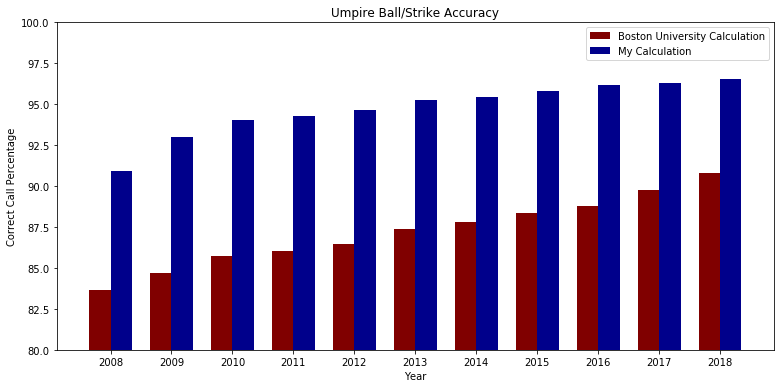

In [100]:
import matplotlib.pyplot as plt

labels = data_4['year'].tolist()
BU_values = data_4['BU_correct_call_percentage'].tolist()
my_values = data_4['my_correct_call_percentage'].tolist()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize = (11, 5.5))
rects1 = ax.bar(x - width / 2, BU_values, width, color = 'maroon', label = 'Boston University Calculation')
rects2 = ax.bar(x + width / 2, my_values, width, color = 'darkblue', label = 'My Calculation')

ax.set_ylabel('Correct Call Percentage')
ax.set_xlabel('Year')
ax.set_title('Umpire Ball/Strike Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(80, 100)

fig.tight_layout()
plt.show()

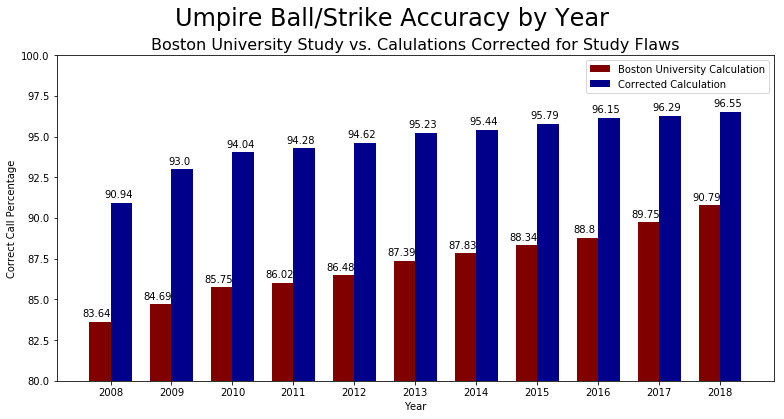

In [112]:
labels = data_4['year'].tolist()
BU_values = data_4['BU_correct_call_percentage'].tolist()
my_values = data_4['my_correct_call_percentage'].tolist()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize = (11, 5.5))
rects1 = ax.bar(x - width / 2, BU_values, width, color = 'maroon', label = 'Boston University Calculation')
rects2 = ax.bar(x + width / 2, my_values, width, color = 'darkblue', label = 'Corrected Calculation')

ax.set_ylabel('Correct Call Percentage')
ax.set_xlabel('Year')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(80, 100)
plt.suptitle('Umpire Ball/Strike Accuracy by Year', fontsize = 24, y = 1.05)
plt.title('Boston University Study vs. Calulations Corrected for Study Flaws', fontsize = 16)

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', 
               xy = (rect.get_x() + rect.get_width() / 2, height), 
               xytext = (-3, 3), 
               textcoords = 'offset points', 
               ha = 'center', va = 'bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

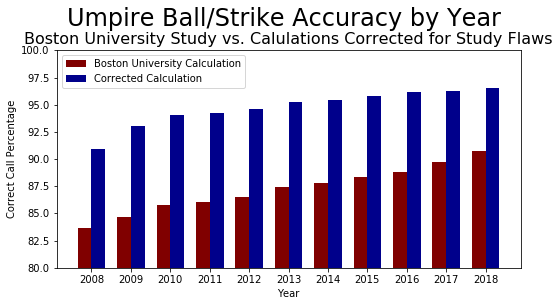

In [114]:
labels = data_4['year'].tolist()
BU_values = data_4['BU_correct_call_percentage'].tolist()
my_values = data_4['my_correct_call_percentage'].tolist()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize = (8, 4))
rects1 = ax.bar(x - width / 2, BU_values, width, color = 'maroon', label = 'Boston University Calculation')
rects2 = ax.bar(x + width / 2, my_values, width, color = 'darkblue', label = 'Corrected Calculation')

ax.set_ylabel('Correct Call Percentage')
ax.set_xlabel('Year')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.ylim(80, 100)
plt.suptitle('Umpire Ball/Strike Accuracy by Year', fontsize = 24, y = 1.05)
plt.title('Boston University Study vs. Calulations Corrected for Study Flaws', fontsize = 16)

fig.tight_layout()
plt.show()

''

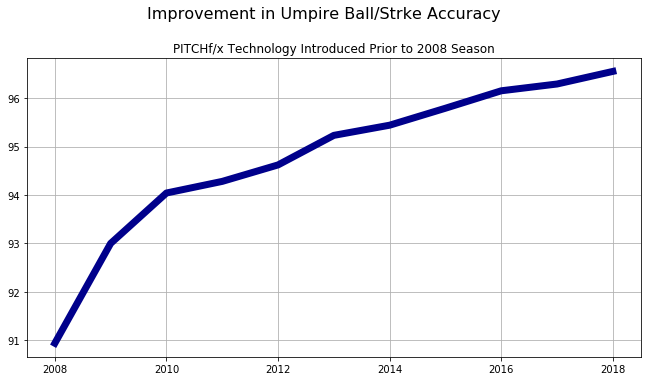

In [136]:
plt.figure(figsize = (11, 5.5))
plt.grid()
plt.plot(labels, my_values, color = 'darkblue', linewidth = 7)
plt.suptitle("Improvement in Umpire Ball/Strke Accuracy", fontsize = 16, y = 1.01)
plt.title("PITCHf/x Technology Introduced Prior to 2008 Season", fontsize = 12)
;